# 1. Read or Extract data

In [1]:
import os
os.listdir(path="Dataset_Files")

['.gitkeep',
 '50_Startups.csv',
 'Churn_Modelling.csv',
 'Employee_attrition.csv',
 'Housing.csv',
 'Mall_Customers.csv',
 'movie_review_test.csv',
 'movie_review_train.csv',
 'Passenger_test.csv',
 'Passenger_train.csv',
 'Pearson.txt',
 'Position_Salaries.csv',
 'Result_Datasets',
 'Salary_Data.csv',
 'Social_Network_Ads.csv',
 'Stud_part1.csv',
 'Stud_part2.csv',
 'winequality-red.csv',
 'winequality-white.csv']

In [2]:
import pandas as pd
data=pd.read_csv("Dataset_Files\\Housing.csv")
data

Unnamed: 0  MedInc  HouseAge  AveRooms  AveBedrms  Population  \
0               0  8.3252      41.0  6.984127   1.023810       322.0   
1               1  8.3014      21.0  6.238137   0.971880      2401.0   
2               2  7.2574      52.0  8.288136   1.073446       496.0   
3               3  5.6431      52.0  5.817352   1.073059       558.0   
4               4  3.8462      52.0  6.281853   1.081081       565.0   
...           ...     ...       ...       ...        ...         ...   
20635       20635  1.5603      25.0  5.045455   1.133333       845.0   
20636       20636  2.5568      18.0  6.114035   1.315789       356.0   
20637       20637  1.7000      17.0  5.205543   1.120092      1007.0   
20638       20638  1.8672      18.0  5.329513   1.171920       741.0   
20639       20639  2.3886      16.0  5.254717   1.162264      1387.0   

       AveOccup  Latitude  Longitude  target  
0      2.555556     37.88    -122.23   4.526  
1      2.109842     37.86    -122.22   3.585  
2      2.802260     37.85    -122.24   3.521  
3      2.547945     37.85    -122.25   3.413  
4      2.181467     37.85    -122.25   3.422  
...         ...       ...        ...     ...  
20635  2.560606     39.48    -121.09   0.781  
20636  3.122807     39.49    -121.21   0.771  
20637  2.325635     39.43    -121.22   0.923  
20638  2.123209     39.43    -121.32   0.847  
20639  2.616981     39.37    -121.24   0.894  

[20640 rows x 10 columns]

# 2. EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20640 non-null  int64  
 1   MedInc      20640 non-null  float64
 2   HouseAge    20640 non-null  float64
 3   AveRooms    20640 non-null  float64
 4   AveBedrms   20640 non-null  float64
 5   Population  20640 non-null  float64
 6   AveOccup    20640 non-null  float64
 7   Latitude    20640 non-null  float64
 8   Longitude   20640 non-null  float64
 9   target      20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [4]:
data.describe()

Unnamed: 0        MedInc      HouseAge      AveRooms     AveBedrms  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean   10319.500000      3.870671     28.639486      5.429000      1.096675   
std     5958.399114      1.899822     12.585558      2.474173      0.473911   
min        0.000000      0.499900      1.000000      0.846154      0.333333   
25%     5159.750000      2.563400     18.000000      4.440716      1.006079   
50%    10319.500000      3.534800     29.000000      5.229129      1.048780   
75%    15479.250000      4.743250     37.000000      6.052381      1.099526   
max    20639.000000     15.000100     52.000000    141.909091     34.066667   

         Population      AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean    1425.476744      3.070655     35.631861   -119.569704      2.068558  
std     1132.462122     10.386050      2.135952      2.003532      1.153956  
min        3.000000      0.692308     32.540000   -124.350000      0.149990  
25%      787.000000      2.429741     33.930000   -121.800000      1.196000  
50%     1166.000000      2.818116     34.260000   -118.490000      1.797000  
75%     1725.000000      3.282261     37.710000   -118.010000      2.647250  
max    35682.000000   1243.333333     41.950000   -114.310000      5.000010

In [5]:
data.isnull().sum()

Unnamed: 0    0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

# 3. Feature Extraction

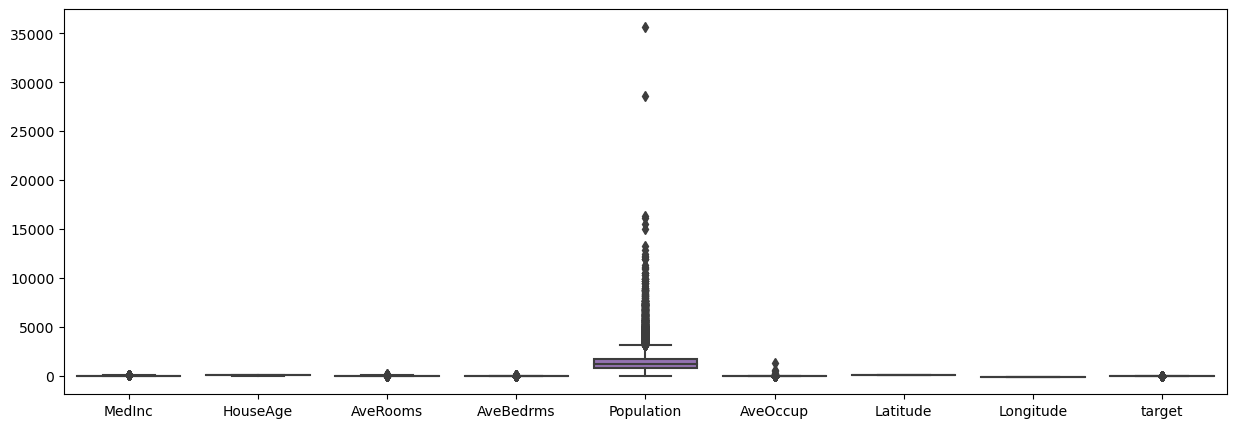

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[15,5])
sns.boxplot(data.iloc[:,1:])#.drop(columns="Population"))
plt.show()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')


<Axes: >

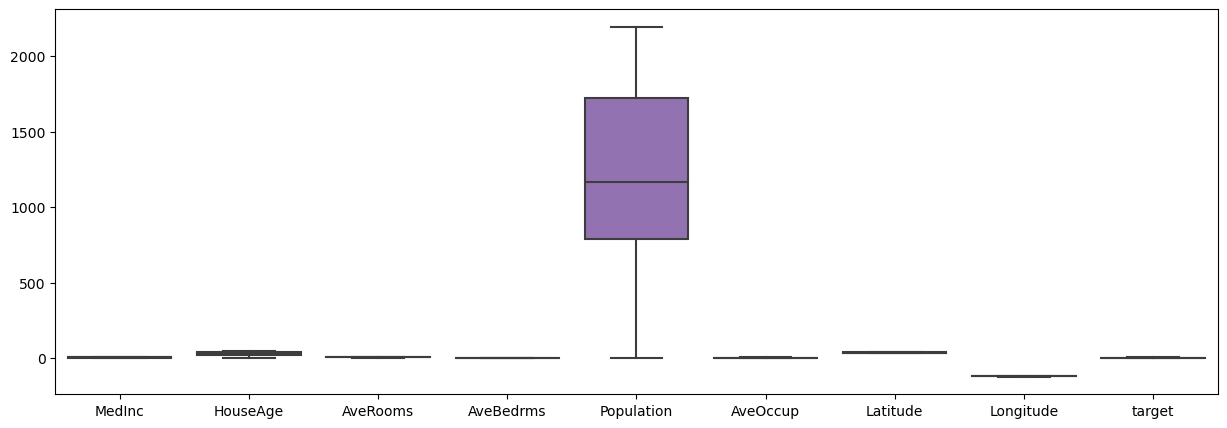

In [7]:

col=data.columns[1:]
print(col)

def f(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1

    lb=q1-(IQR*1.5)
    ub=q1+(IQR*1.5)

    data.loc[data[i]<lb,i]=lb
    data.loc[data[i]>ub,i]=ub

for i in col:
    f(i)

plt.figure(figsize=[15,5])
sns.boxplot(data.iloc[:,1:])

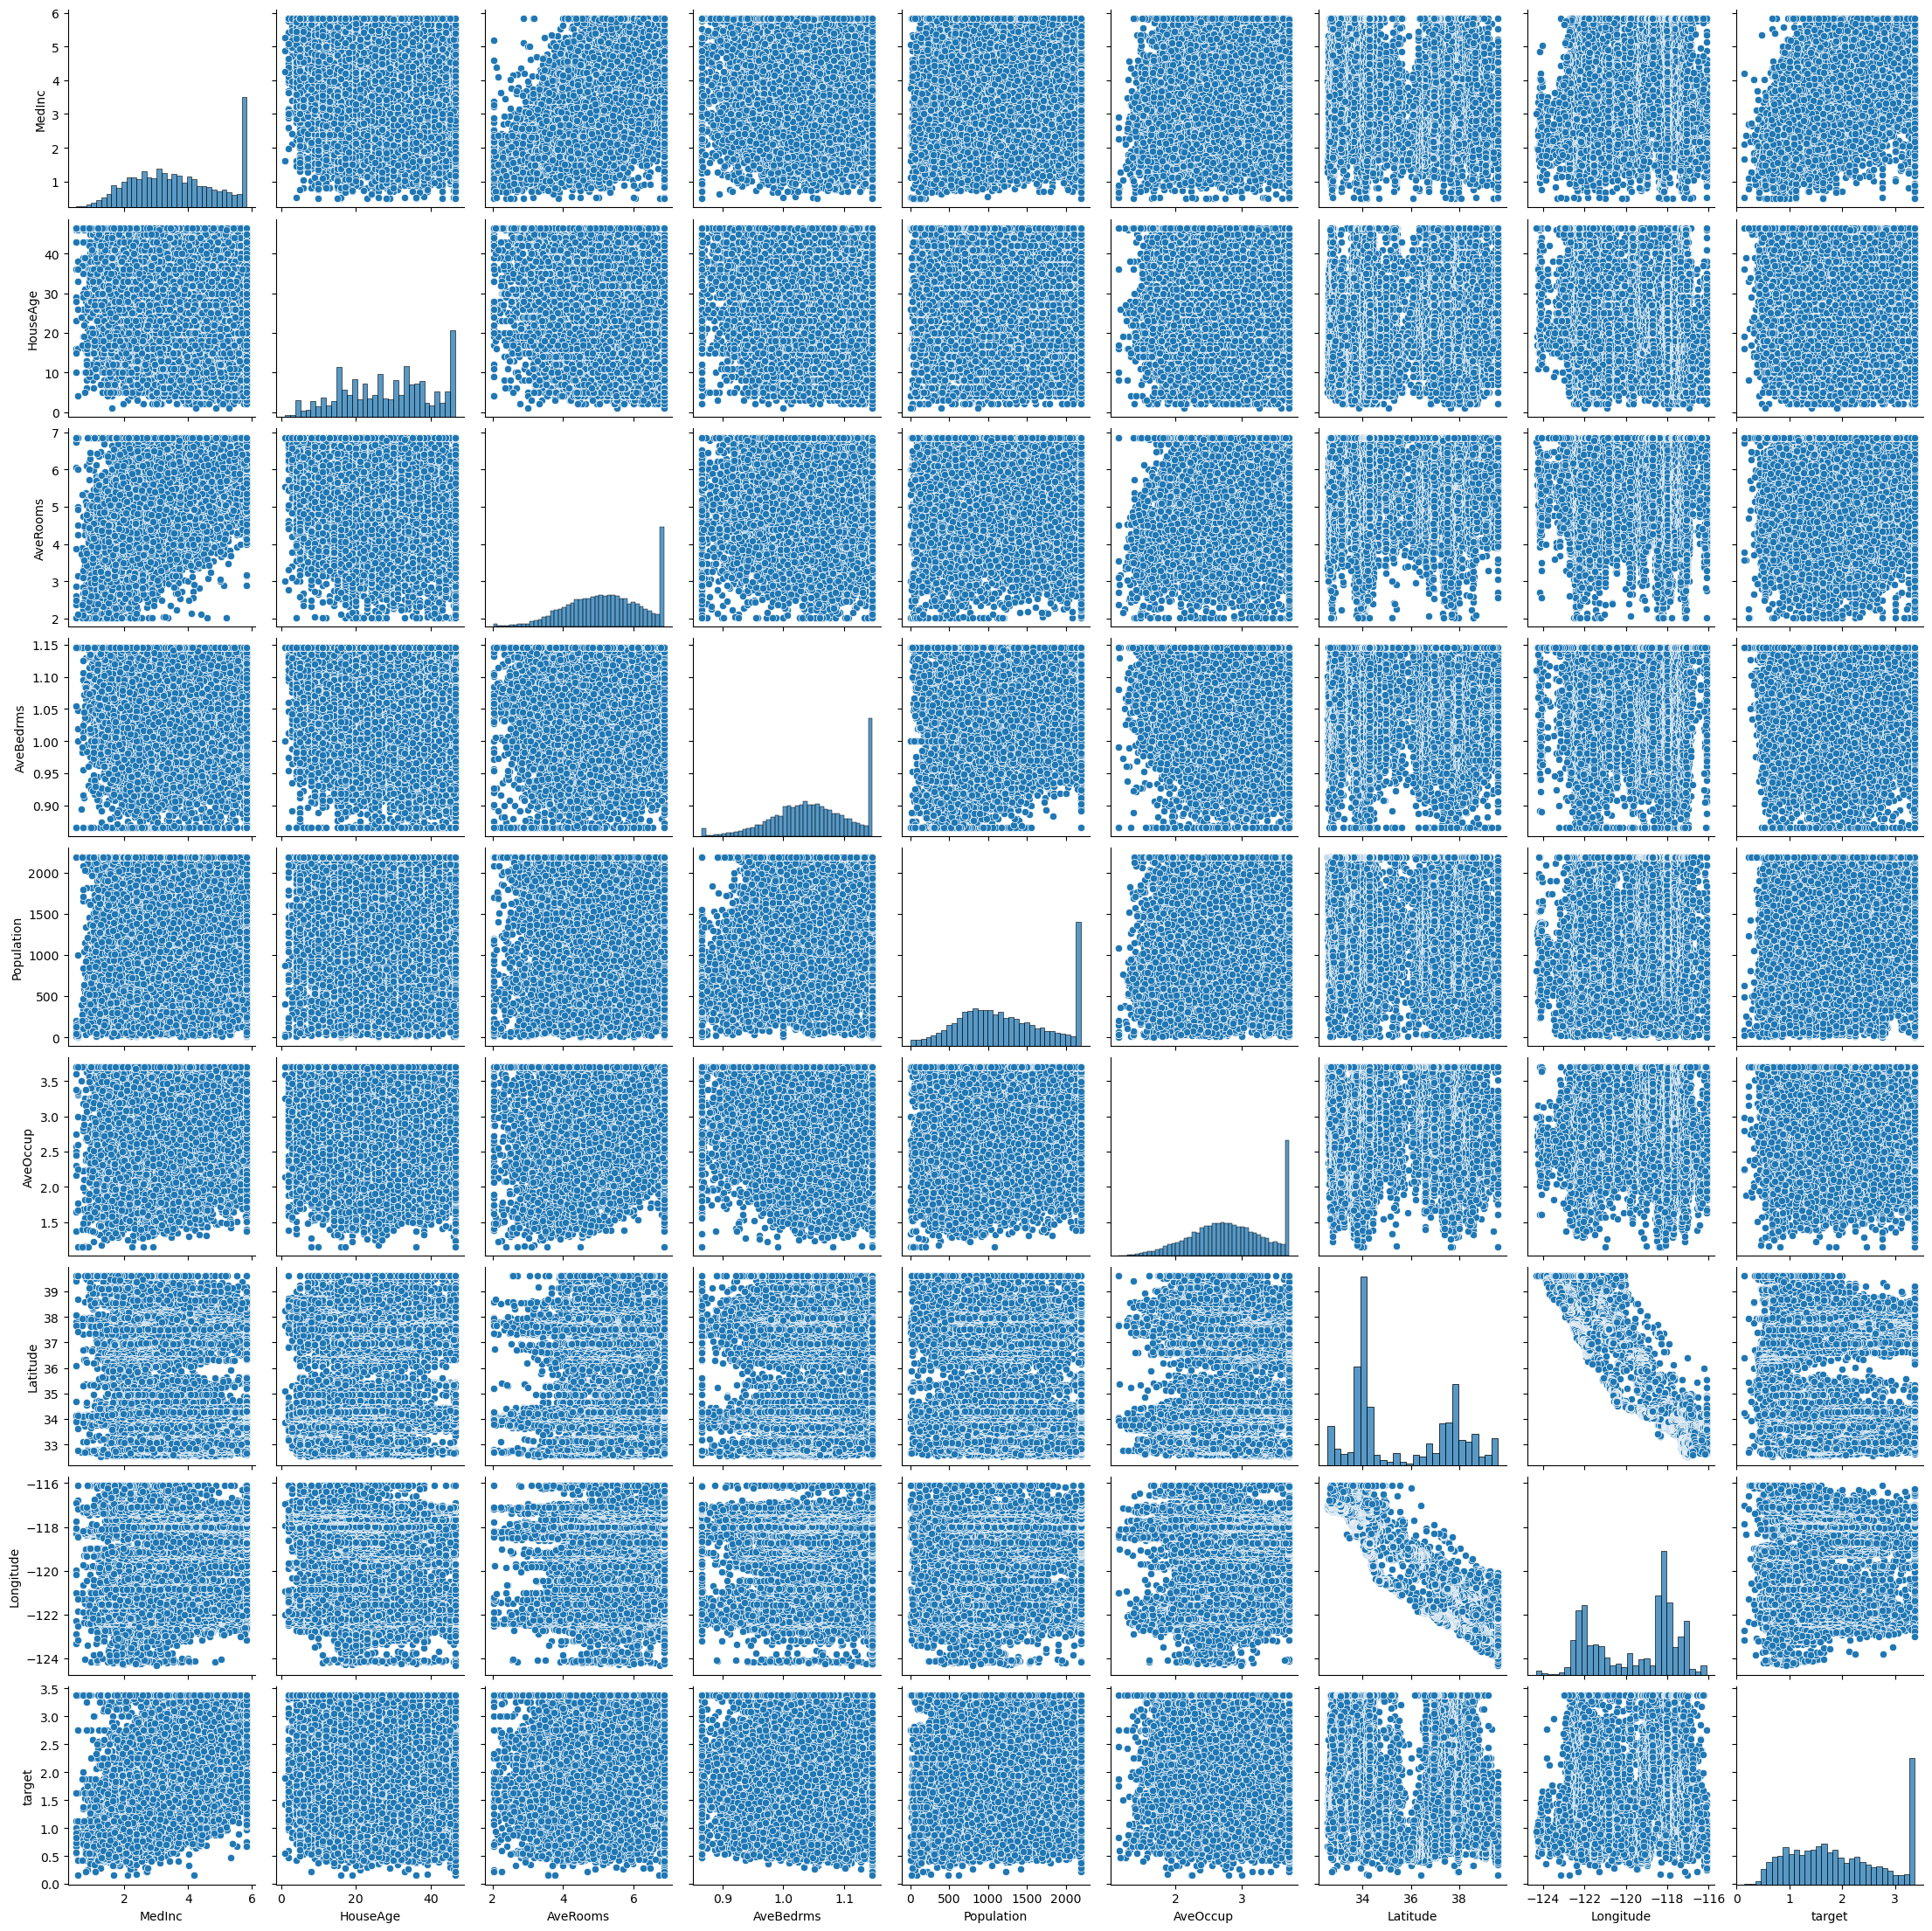

In [8]:
data=data.iloc[:,1:]
sns.pairplot(data)
plt.show()

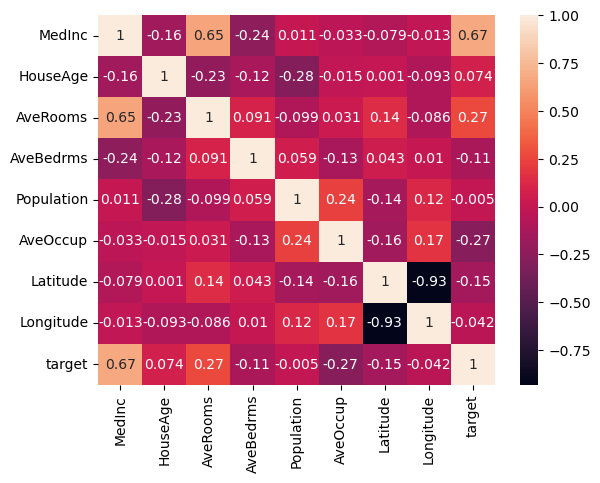

In [9]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [10]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      5.833175      41.0  6.858213   1.023810       322.0  2.555556   
1      5.833175      21.0  6.238137   0.971880      2194.0  2.109842   
2      5.833175      46.5  6.858213   1.073446       496.0  2.802260   
3      5.643100      46.5  5.817352   1.073059       558.0  2.547945   
4      3.846200      46.5  6.281853   1.081081       565.0  2.181467   
...         ...       ...       ...        ...         ...       ...   
20635  1.560300      25.0  5.045455   1.133333       845.0  2.560606   
20636  2.556800      18.0  6.114035   1.146250       356.0  3.122807   
20637  1.700000      17.0  5.205543   1.120092      1007.0  2.325635   
20638  1.867200      18.0  5.329513   1.146250       741.0  2.123209   
20639  2.388600      16.0  5.254717   1.146250      1387.0  2.616981   

       Latitude  Longitude  
0         37.88    -122.23  
1         37.86    -122.22  
2         37.85    -122.24  
3         37.85    -122.25  
4         37.85    -122.25  
...         ...        ...  
20635     39.48    -121.09  
20636     39.49    -121.21  
20637     39.43    -121.22  
20638     39.43    -121.32  
20639     39.37    -121.24  

[20640 rows x 8 columns]

In [11]:
y

0        3.372875
1        3.372875
2        3.372875
3        3.372875
4        3.372875
           ...   
20635    0.781000
20636    0.771000
20637    0.923000
20638    0.847000
20639    0.894000
Name: target, Length: 20640, dtype: float64

# 4. Model Building

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [14]:
from sklearn.svm import SVR
model_svc=SVR()
model_svc.fit(x_train,y_train)

SVR()

In [15]:
import joblib
joblib.dump(model_svc,"New_Model_SVR.pickle")
Load_Model_SVC=joblib.load("New_Model_SVR.pickle")

# 5. Model Prediction

In [16]:
y_pred=Load_Model_SVC.predict(x_test)
y_pred

array([3.05800772, 2.99407156, 1.4395542 , ..., 1.90715593, 1.44654595,
       3.23645959])

# 6. Model Evaluation

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

print(Load_Model_SVC.score(x_test,y_test))
print(Load_Model_SVC.score(x_train,y_train))


0.18211183863267633
0.3058568052955162
0.42674563692283524
0.7690844670183888
0.7917030408672742


# 7. Result Visualization

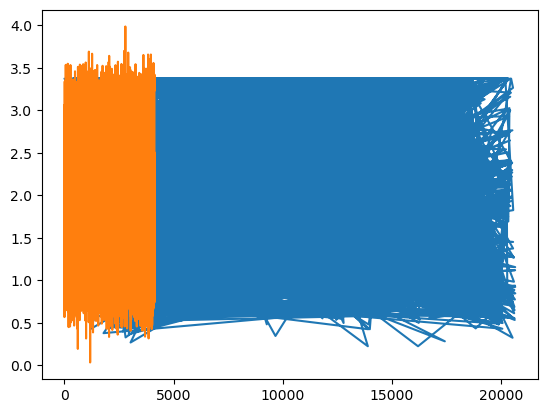

In [18]:
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

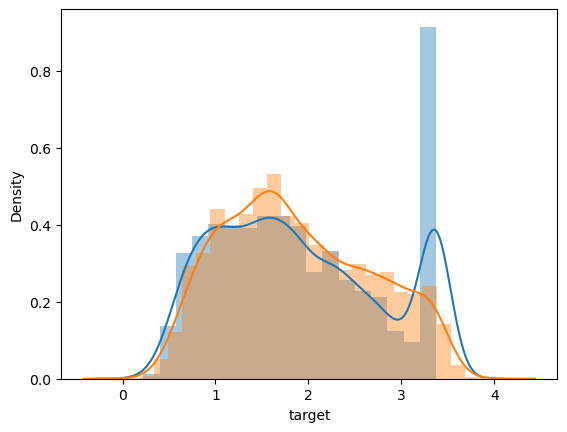

In [19]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(y_test)
sns.distplot(y_pred)
plt.show()

In [20]:
data.iloc[:,8]

0        3.372875
1        3.372875
2        3.372875
3        3.372875
4        3.372875
           ...   
20635    0.781000
20636    0.771000
20637    0.923000
20638    0.847000
20639    0.894000
Name: target, Length: 20640, dtype: float64